In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

import matplotlib.pyplot as plt

from numba import njit, prange

import sys

sys.path.append('../modules/')

import funAdapt as fa

In [4]:
Nsteps = int(1e7)
dt = 1e-3

sigma = 1.5
theta_eta = 3.
tau_a = 1.
sigma_a = 0.1
Lambda = 0.9

a = 1.366

x0 = 0.
y0 = 0.
eta0 = 0.

tau_x = 1.
theta_y = 1.

expected_cov = fa.cov_matrix(sigma, theta_eta, a)
#L, _, _, _, _, _ = fa.find_functional(Nsteps, dt, sigma, a, theta_eta, Lambda, x0, y0, eta0, tau_x = tau_x, theta_y = theta_y)

In [5]:
x0, y0, eta0 = fa.simulate_xyeta(Nsteps, dt, sigma, a, theta_eta, tau_x = 1, theta_y = 1, x0 = 0, y0 = 0, eta0 = 0)
np.cov([x0,y0]), expected_cov

(array([[2.72578934, 2.7520016 ],
        [2.7520016 , 4.73352642]]),
 array([[2.6875    , 2.69998438],
        [2.69998438, 4.68817866]]))

In [6]:
fa.find_functional(Nsteps, dt, sigma, a, theta_eta, Lambda, x0[-1], y0[-1], eta0[-1])

(0.24949535557138935,
 0.6163872668403939,
 1.601126655842366,
 0.9112399392717573,
 1.3352937940001628,
 0.42558303885711735)

In [7]:
fa.find_functional_empirical_cov(Nsteps, dt, sigma, a, theta_eta, Lambda, x0[-1], y0[-1], eta0[-1])

(0.2655681998286938,
 0.9151627000357033,
 0.7078107871390136,
 0.848238788577651,
 1.3505983237550836,
 0.445142258004669)

In [12]:
fa.find_functional_empirical(Nsteps, dt, sigma, a, theta_eta, Lambda, x0[-1], y0[-1], eta0[-1])

(0.3026386725174618,
 2.2812799824909082,
 2.417444976007801,
 0.9638153139671642,
 1.2720188074522247,
 0.4776006147363158)

In [8]:
0.5*np.log(expected_cov[0,0]*expected_cov[1,1]/np.linalg.det(expected_cov))

0.4320728674586061

In [9]:
fa.functional_exact(sigma, a, theta_eta, Lambda)

0.432072867458606 1.310108695345084


0.257854711178237

[0.13934944 0.14587726 0.15241821 0.15896464 0.16550932 0.17204543
 0.17856661 0.18506687 0.19154065 0.19798276 0.20438839 0.21075311
 0.21707282 0.22334376 0.22956248 0.23572585 0.24183103 0.24787545
 0.25385679 0.259773   0.26562226 0.27140296 0.27711369 0.28275326
 0.28832064 0.29381499 0.29923561 0.30458196 0.30985363 0.31505036
 0.32017199 0.32521846 0.33018984 0.33508629 0.33990803 0.34465538
 0.34932874 0.35392856 0.35845536 0.36290971 0.36729223 0.37160359
 0.3758445  0.3800157  0.38411797 0.3881521  0.39211893 0.39601932
 0.39985412 0.40362422 0.40733052 0.41097393 0.41455537 0.41807576
 0.42153603 0.42493711 0.42827994 0.43156544 0.43479455 0.43796819
 0.4410873  0.4441528  0.44716558 0.45012658 0.45303667 0.45589677
 0.45870774 0.46147047 0.46418582 0.46685464 0.46947779 0.47205608
 0.47459034 0.47708139 0.47953002 0.48193702 0.48430317 0.48662923
 0.48891594 0.49116405 0.49337429 0.49554737 0.497684   0.49978485
 0.50185062 0.50388197 0.50587955 0.507844   0.50977596 0.5116

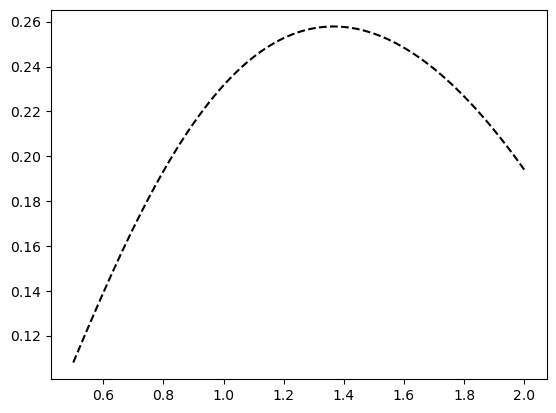

In [10]:
a_array = np.linspace(0.5, 2, 100)
plt.plot(a_array, fa.functional_exact(sigma, a_array, theta_eta, Lambda), 'k--')

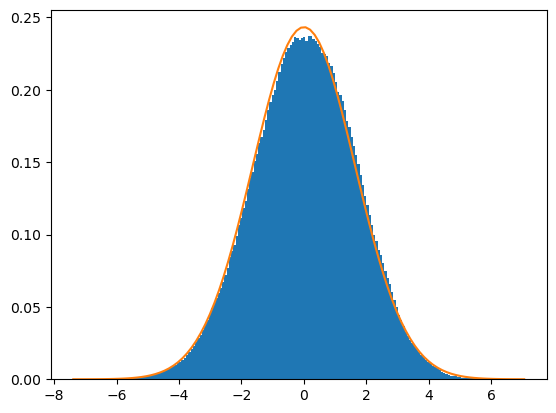

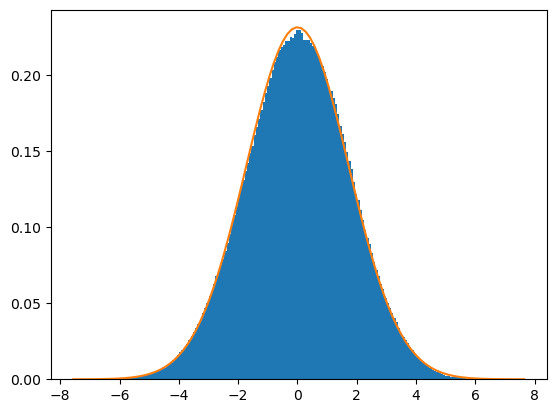

In [6]:
plt.hist(x, bins = 200, density = True)
xspace = np.linspace(np.min(x), np.max(x), 100)
px = fa.probability_x(xspace, expected_cov)
plt.plot(xspace, px)
plt.show()

plt.hist(y, bins = 200, density = True)
yspace = np.linspace(np.min(y), np.max(y), 100)
py = fa.probability_y(yspace, expected_cov)
plt.plot(yspace, py)
plt.show()

In [3]:
Nsteps = int(5e2)
dt = 1e-3

sigma = 1.5
theta_eta = 3.
tau_a = 1.
sigma_a = 0.1
Lambda = 0.9

amean = 1.36585


L, _, _, _, S, I, afluct = fa.find_functional_afluc(Nsteps, dt, sigma, amean, tau_a, sigma_a, theta_eta, Lambda, x0 = 0, y0 = 0, eta0 = 0, tau_x = 1, theta_y = 1)

In [4]:
L

0.24570286337808467

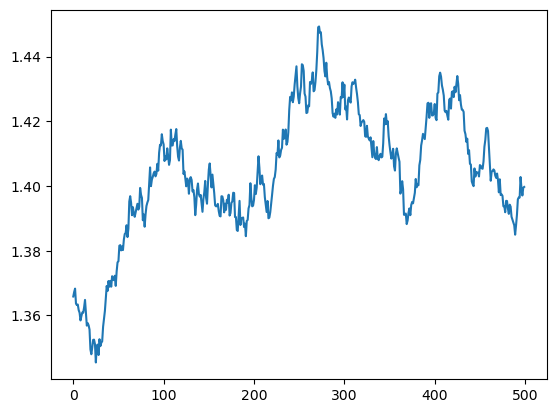

In [5]:
plt.plot(afluct)
plt.show()

# Plots

In [6]:
Nadapt_max = 50000
Nadapt_min = 10000
Ncheck = 5000
Nrepeat = 320
sigma = 1.5
theta_eta = 3.

delta_a = 0.05
Lambda = 0.9

dt = 1e-3

Nsteps_array = np.array([3, 4, 5, 6, 7])
Nsteps_array = 10**Nsteps_array

In [7]:
a_array = np.linspace(0, 1.8, 1000)

In [8]:
a_final = np.zeros((len(Nsteps_array), Nrepeat))

for i in range(len(Nsteps_array)):
    a_adapt = np.load(f'../data/adaptEmpCov_a_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    stop_time_adapt = np.load(f'../data/adaptEmpCov_stopTime_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    print(a_adapt.shape)
    for j in range(Nrepeat):
        a_curr = a_adapt[j, :stop_time_adapt[j]]
        a_final[i, j] = abs(a_curr[-1])    

(320, 50000)
(320, 50000)
(320, 50000)
(320, 50000)
(320, 50000)


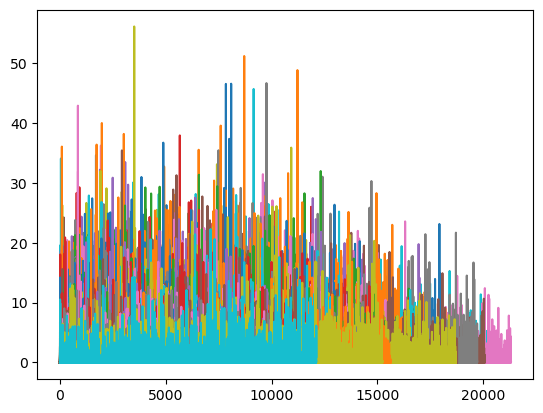

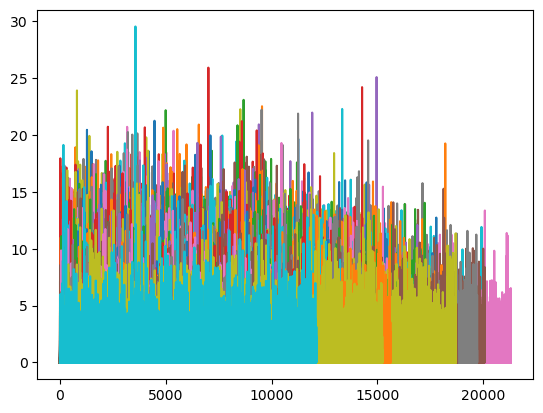

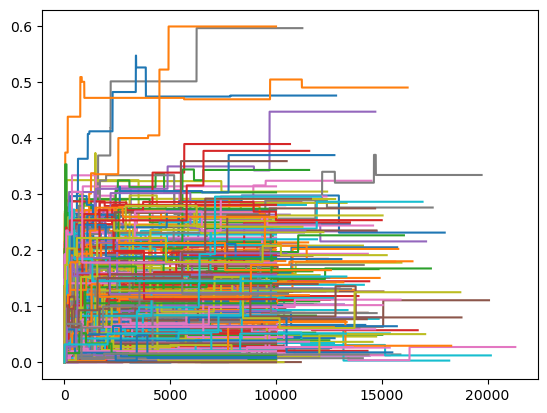

11665.19375 2362.277949874006
0.1262589829682296 0.10312390501767618


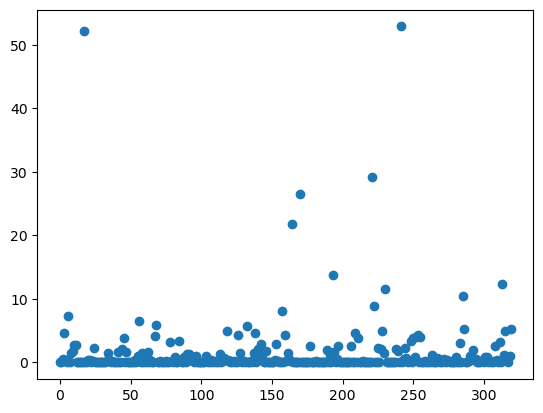

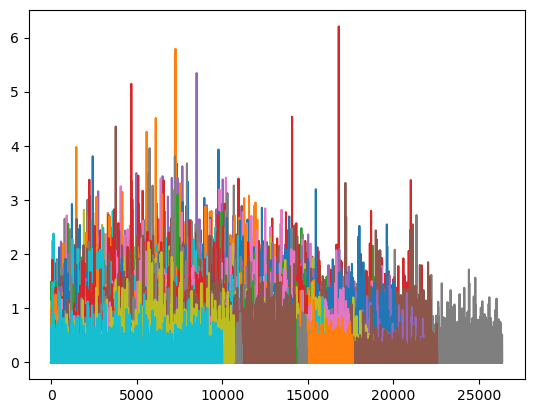

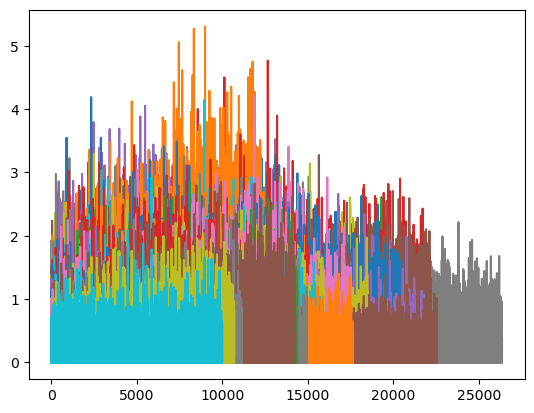

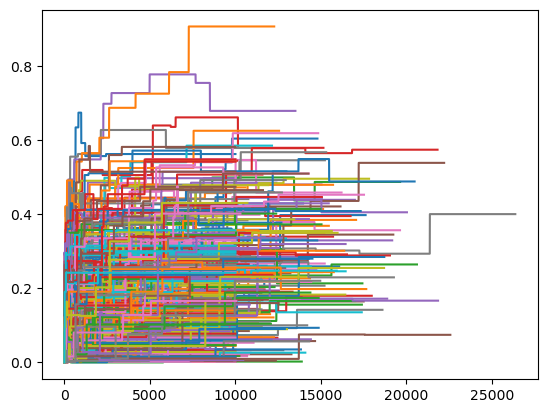

12334.41875 2994.835881296075
0.25468984227447067 0.1583527609066371


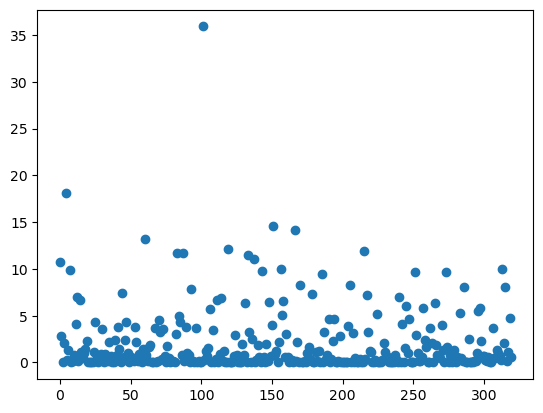

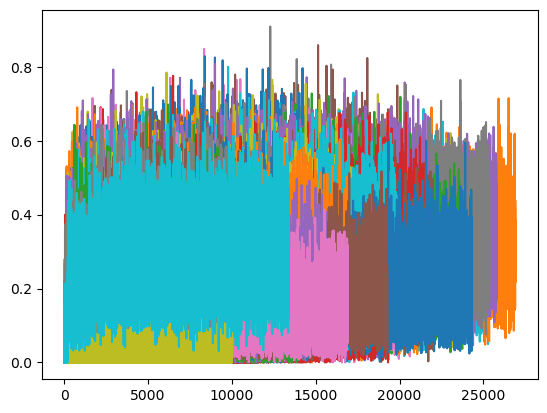

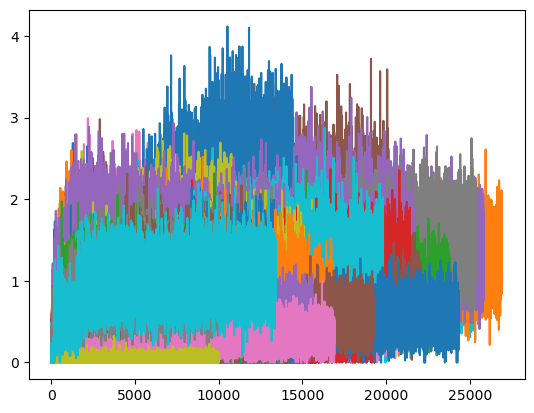

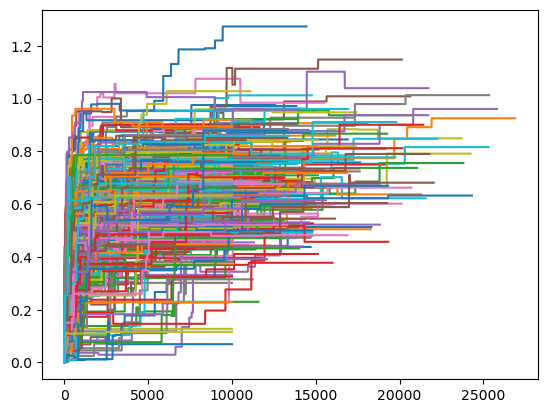

13069.890625 3661.1243411228347
0.6652514553107076 0.17478873672762563


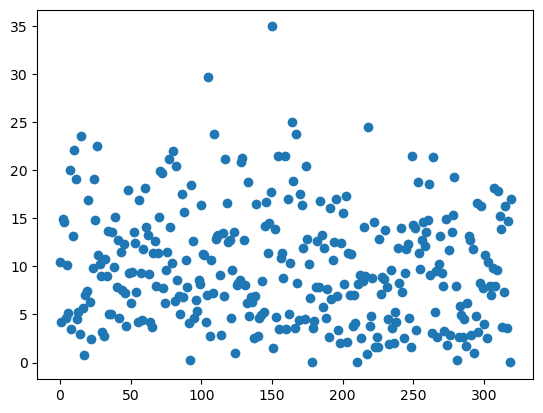

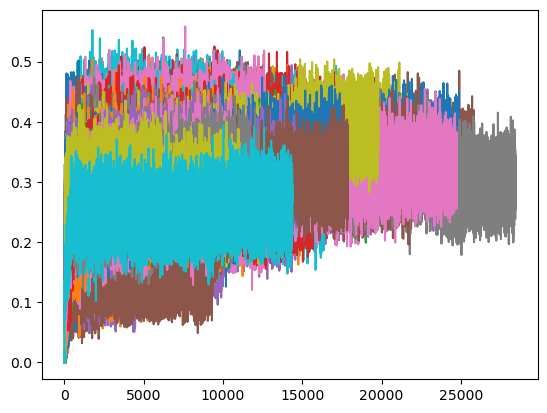

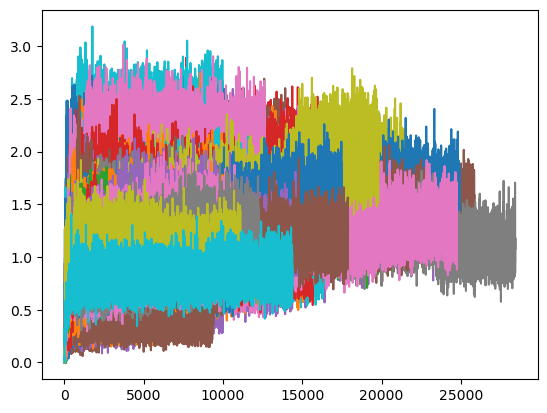

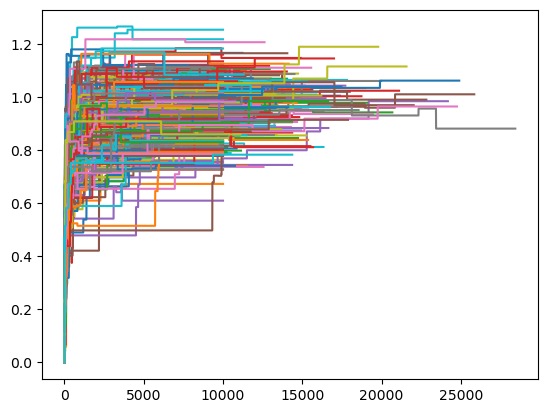

12224.475 3194.1954433980713
0.9501136051296285 0.10015242722387674


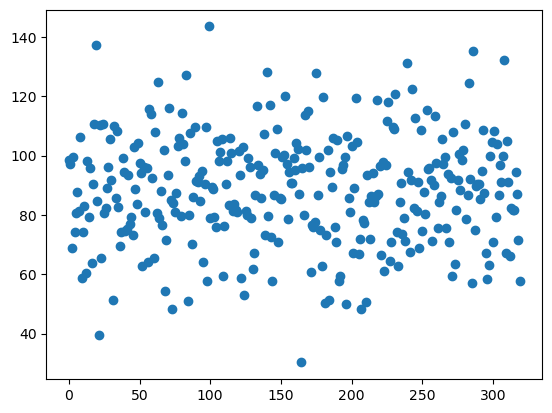

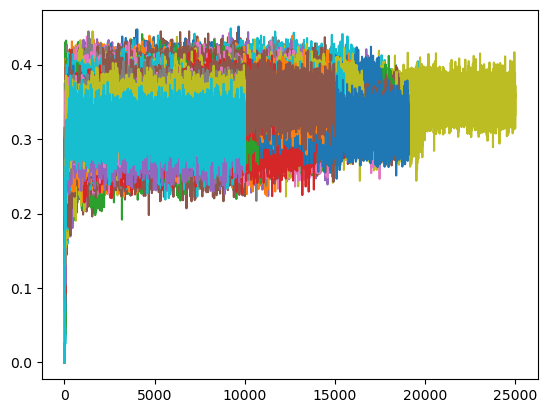

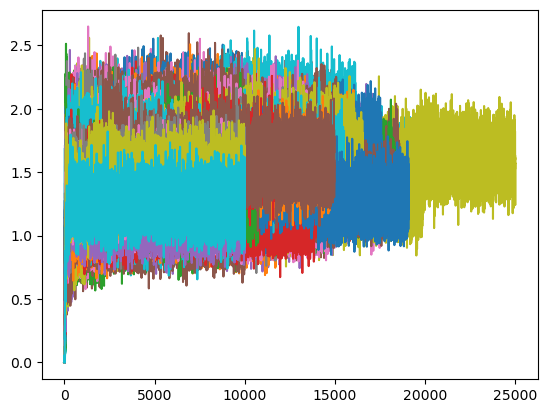

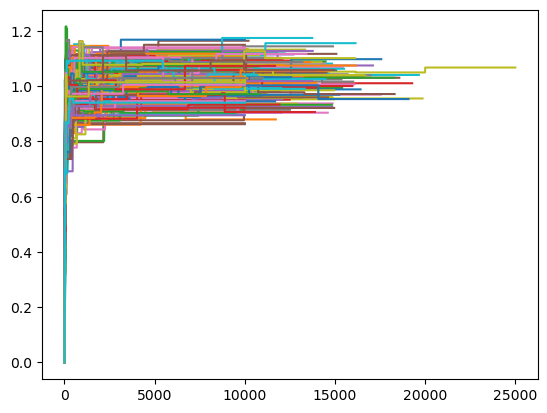

11740.603125 2397.693498837004
1.0224307006704205 0.057032540070166754


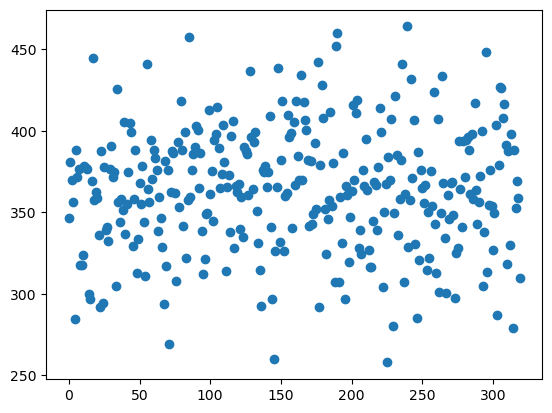

In [11]:
for i in range(len(Nsteps_array)):
    Ixy_adapt = np.load(f'../data/adaptEmpCov_Ixy_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    Sxy_adapt = np.load(f'../data/adaptEmpCov_Sxy_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    a_adapt = np.load(f'../data/adaptEmpCov_a_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    stop_time_adapt = np.load(f'../data/adaptEmpCov_stopTime_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')

    Ixy_adapt[Ixy_adapt < 0] = 0
    Sxy_adapt[Sxy_adapt < 0] = 0

    for j in range(Nrepeat):
        Ixy_curr = Ixy_adapt[j, :stop_time_adapt[j]]
        plt.plot(Ixy_curr/(Nsteps_array[i]))
    plt.show()
    
    for j in range(Nrepeat):
        Sxy_curr = Sxy_adapt[j, :stop_time_adapt[j]]
        plt.plot(Sxy_curr/(Nsteps_array[i]))
    plt.show()
    a_final = np.zeros(Nrepeat)
    for j in range(Nrepeat):
        a_curr = a_adapt[j, :stop_time_adapt[j]]
        plt.plot(abs(a_curr))
        a_final[j] = abs(a_curr[-1])
    plt.show()

    print(np.mean(stop_time_adapt), np.std(stop_time_adapt))
    print(np.mean(a_final), np.std(a_final))

    Stot = np.zeros(Nrepeat)
    Iyeta = np.zeros(Nrepeat)
    timetot = np.zeros(Nrepeat)

    for j in range(Nrepeat):
        timetot[j] = Nsteps_array[i]*stop_time_adapt[j]*dt
        Stot[j] = fa.Sxy_exact(sigma, a_final[j], theta_eta)*timetot[j]
        Iyeta[j] = fa.Ixy_exact(sigma, a_final[j], theta_eta)

    plt.scatter(range(Nrepeat),Iyeta**2/np.var(Iyeta))
    plt.show()
    print()

In [204]:
@njit
def adaptive_dynamics(Nsteps, dt, sigma, theta_eta, Lambda, delta_a,
                      Ncheck = 2000, Nadapt_min = 5000, Nadapt_max = 10000,
                      a_init = 0., tau_x = 1, theta_y = 1, Nburn = 100000,
                      empirical = False, seed = 0):
    
    np.random.seed(seed)
    
    x0_burn, y0_burn, eta0_burn = fa.simulate_xyeta(Nburn, dt, sigma, a_init, theta_eta, tau_x, theta_y)
    x0 = x0_burn[-1]
    y0 = y0_burn[-1]
    eta0 = eta0_burn[-1]

    x0_burn = None
    y0_burn = None
    eta0_burn = None

    L_adapt = np.zeros(Nadapt_max, dtype = np.float64)
    a_adapt = np.zeros(Nadapt_max, dtype = np.float64)
    Ixy_adapt = np.zeros(Nadapt_max, dtype = np.float64)
    Sxy_adapt = np.zeros(Nadapt_max, dtype = np.float64)
    L_adapt[0] = 0.
    a_adapt[0] = a_init

    stop_counter = 0
    stop_time = Nadapt_max

    for idx_adapt in range(1, Nadapt_max):
        a_bar = a_adapt[idx_adapt - 1] + delta_a * np.random.randn()
        if empirical:
            L_bar, x0, y0, eta0, Sxy, Ixy = fa.find_functional_empirical(Nsteps, dt, sigma, a_bar, theta_eta, Lambda, x0, y0, eta0, tau_x, theta_y)
        else:
            L_bar, x0, y0, eta0, Sxy, Ixy = fa.find_functional(Nsteps, dt, sigma, a_bar, theta_eta, Lambda, x0, y0, eta0, tau_x, theta_y)

        Sxy_adapt[idx_adapt] = Sxy
        Ixy_adapt[idx_adapt] = Ixy        

        if L_bar > L_adapt[idx_adapt - 1]:
            a_adapt[idx_adapt] = a_bar
            L_adapt[idx_adapt] = L_bar

            stop_counter = 0
        else:
            a_adapt[idx_adapt] = a_adapt[idx_adapt - 1]
            L_adapt[idx_adapt] = L_adapt[idx_adapt - 1]

            stop_counter += 1

            if idx_adapt > Nadapt_min and stop_counter > Ncheck:
                stop_time = idx_adapt
                break

    return a_adapt, L_adapt, Ixy_adapt, Sxy_adapt, stop_time

In [208]:
a_adapt, L_adapt, Ixy_adapt, Sxy_adapt, stop_time_adapt = adaptive_dynamics(1000, dt, sigma, theta_eta, Lambda, delta_a,
                                                                            Ncheck, Nadapt_min, Nadapt_max, empirical = True, seed = 1)
print(stop_time_adapt)

14475


In [210]:
seeds = np.arange(100)
test_stop_times = np.zeros(len(seeds))
for i in range(len(seeds)):
    a_adapt, L_adapt, Ixy_adapt, Sxy_adapt, stop_time_adapt = adaptive_dynamics(1000, dt, sigma, theta_eta, Lambda, delta_a,
                                                                                Ncheck, Nadapt_min, Nadapt_max, empirical = True, seed = seeds[i])
    test_stop_times[i] = stop_time_adapt
    print(i, stop_time_adapt)

0 11928
1 14475
2 10001
3 10001
4 14103
5 12454
6 10001
7 10001
8 17030
9 12256
10 13788
11 11222
12 11351
13 14892
14 11587
15 18095
16 10001
17 10001
18 10001
19 10001
20 10001
21 10001
22 18438
23 10001
24 15168
25 14745
26 21435
27 10001
28 13164
29 10560
30 10008
31 15074
32 10001
33 11779
34 10001
35 12107
36 14322
37 10001
38 16175
39 12102
40 10001
41 13892
42 10001
43 10001
44 10001
45 13150
46 10001
47 10001
48 10001
49 19627
50 10001
51 10001
52 13066
53 10949
54 10310
55 13836
56 16268
57 10001
58 10001
59 10001
60 10319
61 10067
62 11995
63 10001
64 10001
65 11099
66 11968
67 15174
68 12311
69 10001
70 10001
71 10001
72 10001
73 10001
74 15857
75 10001
76 14232
77 10559
78 10001
79 11870
80 10001
81 10001
82 12203
83 10001
84 10001
85 10001
86 10837
87 12525
88 10001
89 10001
90 10001
91 10113
92 14188
93 10001
94 10001
95 10001
96 11772
97 13619
98 10001
99 16858


In [213]:
test_stop_times.min()

10001.0

In [215]:
a_adapt, L_adapt, Ixy_adapt, Sxy_adapt, stop_time_adapt = fa.repeat_adaptive_dynamics(Nrepeat, 1000, dt, sigma, theta_eta, Lambda, delta_a,
                                                                                      Ncheck, Nadapt_min, Nadapt_max, empirical_cov = True)

In [217]:
stop_time_adapt.min()

10001

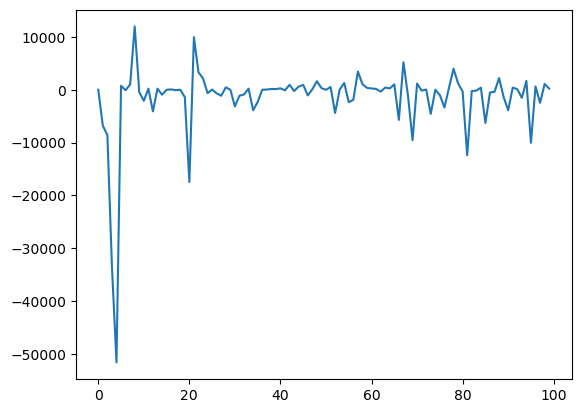

In [81]:
plt.plot(Ixy_adapt[178][:100])

In [7]:
x0_burn, y0_burn, eta0_burn = fa.simulate_xyeta(1000000, dt, sigma, 0., theta_eta, tau_x = 1, theta_y = 1)
x0 = x0_burn[-1]
y0 = y0_burn[-1]
eta0 = eta0_burn[-1]

In [8]:
fa.find_functional_empirical_cov(1000, dt, sigma, 0., theta_eta, Lambda, x0, y0, eta0, tau_x = 1, theta_y = 1)

(0.06371448371905376,
 -0.08625983984458771,
 -0.1327763135756227,
 0.6018461257202035,
 275.4264692650123,
 101.32601795759547)

In [9]:
Nsteps = 10000
x, y, eta = fa.simulate_xyeta(Nsteps, dt, sigma, 3., theta_eta, 1., 1., x0, y0, eta0)

In [10]:
cov = np.cov(x, y)
det = np.linalg.det(cov)
cov_inv = np.linalg.inv(cov)

print(cov)

Ixy = 0.

for t in range(Nsteps-1):
    pjoint_curr = fa.probability_xy(x[t], y[t], det, cov_inv)
    px_curr = fa.probability_x(x[t], cov)
    py_curr = fa.probability_y(y[t], cov)
    Ixy += np.log(pjoint_curr / (px_curr * py_curr))
Ixy/Nsteps

[[1.72334356 2.93856682]
 [2.93856682 8.08076972]]


0.5199604988128302

In [11]:
@njit(nogil=True, parallel=False)
def hist2d_numba_seq(tracks, bins, ranges):
    H = np.zeros((bins[0], bins[1]), dtype=np.uint64)
    delta = 1 / ((ranges[:, 1] - ranges[:, 0]) / bins)

    for t in range(tracks.shape[1]):
        i = (tracks[0, t] - ranges[0, 0]) * delta[0]
        j = (tracks[1, t] - ranges[1, 0]) * delta[1]
        if 0 <= i < bins[0] and 0 <= j < bins[1]:
            H[int(i), int(j)] += 1

    dx = (ranges[0, 1] - ranges[0, 0]) / bins[0]
    dy = (ranges[1, 1] - ranges[1, 0]) / bins[1]

    return H/np.sum(H*dx*dy)

@njit
def numba_log_zero(array):
    # returns the log of each element of the array, if the element is zero, returns zero
    # the array is 2D
    N = array.shape[0]
    M = array.shape[1]
    out = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            if array[i, j] > 0:
                out[i, j] = np.log(array[i, j])

    return out

@njit
def find_bin(val, bins):
    for i in range(len(bins) - 1):
        if bins[i] <= val < bins[i + 1]:
            return i

    return -1

In [12]:
bins = np.array((1000, 1000))
ranges = np.array(((np.min(x), np.max(x)), (np.min(y), np.max(y))))

xbins_space = np.linspace(ranges[0, 0], ranges[0, 1], bins[0])
ybins_space = np.linspace(ranges[1, 0], ranges[1, 1], bins[1])

dx = (ranges[0, 1] - ranges[0, 0]) / bins[0]
dy = (ranges[1, 1] - ranges[1, 0]) / bins[1]

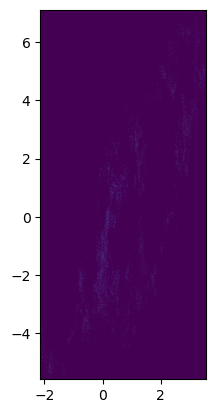

In [19]:
pxy_emp = fa.hist2d_numba_seq(np.array([x,y]), bins=bins, ranges=ranges)

plt.imshow(pxy_emp, extent=(ranges[0, 0], ranges[0, 1], ranges[1, 0], ranges[1, 1]), origin='lower', cmap='viridis')

In [14]:
px_emp = np.sum(pxy_emp*dy, axis = 0)
py_emp = np.sum(pxy_emp*dx, axis = 1)

pxy_factor = np.outer(px_emp, py_emp)

np.sum((numba_log_zero(pxy_emp) - numba_log_zero(pxy_factor))*dx*dy*pxy_emp)

4.71634329207385

In [15]:
Ixy = 0.

for t in range(Nsteps-1):
    xbin = find_bin(x[t], xbins_space)
    ybin = find_bin(y[t], ybins_space)
    pjoint_curr = pxy_emp[xbin, ybin]
    px_curr = px_emp[xbin]
    py_curr = py_emp[ybin]
    if px_curr * py_curr > 0 and pjoint_curr > 0:
        Ixy += np.log(pjoint_curr / (px_curr * py_curr))
Ixy/Nsteps

1.659317701798394

In [16]:
expected_cov = fa.cov_matrix(sigma, theta_eta, 3.)
det = np.linalg.det(expected_cov)
cov_inv = np.linalg.inv(expected_cov)

Ixy = 0.

print(expected_cov)

for t in range(Nsteps-1):
    pjoint_curr = fa.probability_xy(x[t], y[t], det, cov_inv)
    px_curr = fa.probability_x(x[t], expected_cov)
    py_curr = fa.probability_y(y[t], expected_cov)
    Ixy += np.log(pjoint_curr / (px_curr * py_curr))

Ixy/Nsteps

[[ 2.6875     5.9296875]
 [ 5.9296875 18.7890625]]


0.5274211686947805

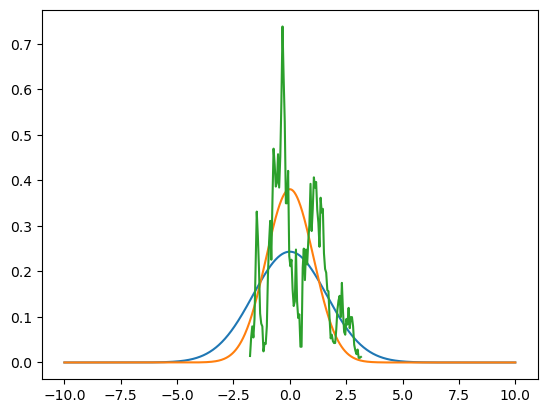

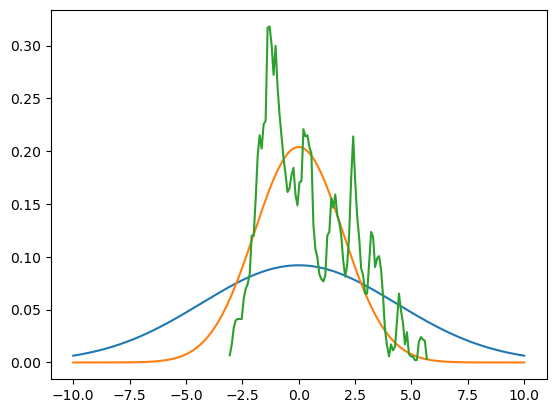

In [365]:
xspace = np.linspace(-10, 10, 1000)
px = fa.probability_x(xspace, expected_cov)
px_emp_cov = fa.probability_x(xspace, cov)
plt.plot(xspace, px)
plt.plot(xspace, px_emp_cov)
plt.plot(xbins_space, px_emp)
plt.plot
plt.show()

yspace = np.linspace(-10, 10, 1000)
py = fa.probability_y(yspace, expected_cov)
py_emp_cov = fa.probability_y(yspace, cov)
plt.plot(yspace, py)
plt.plot(yspace, py_emp_cov)
plt.plot(ybins_space, py_emp)
plt.show()

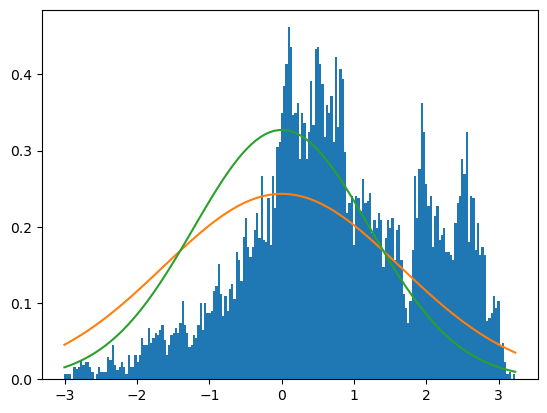

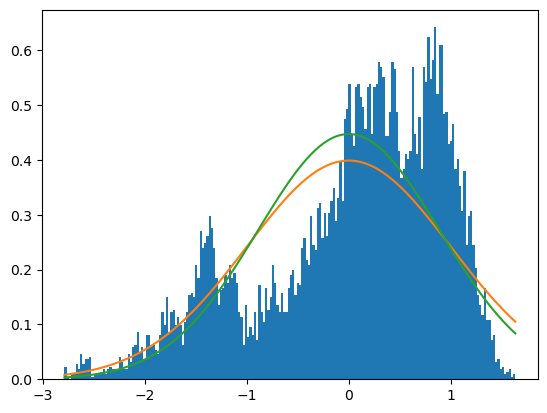

In [145]:
plt.hist(x, bins = 200, density = True)
xspace = np.linspace(np.min(x), np.max(x), 100)
px = fa.probability_x(xspace, expected_cov)
px_emp = fa.probability_x(xspace, cov)
plt.plot(xspace, px)
plt.plot(xspace, px_emp)
plt.show()

plt.hist(y, bins = 200, density = True)
yspace = np.linspace(np.min(y), np.max(y), 100)
py = fa.probability_y(yspace, expected_cov)
plt.plot(yspace, py)
py_emp = fa.probability_y(yspace, cov)
plt.plot(yspace, py_emp)
plt.show()

In [18]:
Nadapt_max = 5000
Nadapt_min = 1000
Ncheck = 500
Nrepeat = 5
sigma = 1.5
theta_eta = 3.

delta_a = 0.05
Lambda = 0.9

dt = 1e-3
_ = fa.repeat_adaptive_dynamics(Nrepeat, 1000, dt, sigma, theta_eta, Lambda, delta_a, Ncheck, Nadapt_min, Nadapt_max, empirical_cov = False,
                                empirical = True)


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<built-in function array>) found for signature:
 
 >>> array(list(array(float64, 1d, C))<iv=None>)
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'impl_np_array': File: numba/np/arrayobj.py: Line 5421.
    With argument(s): '(list(array(float64, 1d, C))<iv=None>)':
   Rejected as the implementation raised a specific error:
     TypingError: Failed in nopython mode pipeline (step: nopython frontend)
   No implementation of function Function(<intrinsic np_array>) found for signature:
    
    >>> np_array(list(array(float64, 1d, C))<iv=None>, none)
    
   There are 2 candidate implementations:
         - Of which 2 did not match due to:
         Intrinsic in function 'np_array': File: numba/np/arrayobj.py: Line 5395.
           With argument(s): '(list(array(float64, 1d, C))<iv=None>, none)':
          Rejected as the implementation raised a specific error:
            TypingError: array(float64, 1d, C) not allowed in a homogeneous sequence
     raised from /mnt/attached_volume/data_gnico/miniconda3/envs/gnico/lib/python3.11/site-packages/numba/core/typing/npydecl.py:482
   
   During: resolving callee type: Function(<intrinsic np_array>)
   During: typing of call at /mnt/attached_volume/data_gnico/miniconda3/envs/gnico/lib/python3.11/site-packages/numba/np/arrayobj.py (5432)
   
   
   File "../../miniconda3/envs/gnico/lib/python3.11/site-packages/numba/np/arrayobj.py", line 5432:
       def impl(object, dtype=None):
           return np_array(object, dtype)
           ^

  raised from /mnt/attached_volume/data_gnico/miniconda3/envs/gnico/lib/python3.11/site-packages/numba/core/typeinfer.py:1091

During: resolving callee type: Function(<built-in function array>)
During: typing of call at /mnt/attached_volume/data_gnico/InfoTrasduction/notebooks/../modules/funAdapt.py (532)


File "../modules/funAdapt.py", line 532:
def find_functional_empirical(Nsteps, dt, sigma, a, theta_eta,
    <source elided>

    pxy_emp = hist2d_numba_seq(np.array([x,y]), bins=bins, ranges=ranges)
    ^

During: resolving callee type: type(CPUDispatcher(<function find_functional_empirical at 0x7efca381b1a0>))
During: typing of call at /mnt/attached_volume/data_gnico/InfoTrasduction/notebooks/../modules/funAdapt.py (589)

During: resolving callee type: type(CPUDispatcher(<function find_functional_empirical at 0x7efca381b1a0>))
During: typing of call at /mnt/attached_volume/data_gnico/InfoTrasduction/notebooks/../modules/funAdapt.py (589)

During: resolving callee type: type(CPUDispatcher(<function find_functional_empirical at 0x7efca381b1a0>))
During: typing of call at /mnt/attached_volume/data_gnico/InfoTrasduction/notebooks/../modules/funAdapt.py (589)


File "../modules/funAdapt.py", line 589:
def adaptive_dynamics(Nsteps, dt, sigma, theta_eta, Lambda, delta_a,
    <source elided>
        elif empirical:
            L_bar, x0, y0, eta0, Sxy, Ixy = find_functional_empirical(Nsteps, dt, sigma, a_bar, theta_eta, Lambda, x0, y0, eta0, tau_x, theta_y)
            ^

During: resolving callee type: type(CPUDispatcher(<function adaptive_dynamics at 0x7efca381b7e0>))
During: typing of call at /mnt/attached_volume/data_gnico/InfoTrasduction/notebooks/../modules/funAdapt.py (625)

During: resolving callee type: type(CPUDispatcher(<function adaptive_dynamics at 0x7efca381b7e0>))
During: typing of call at /mnt/attached_volume/data_gnico/InfoTrasduction/notebooks/../modules/funAdapt.py (625)


File "../modules/funAdapt.py", line 625:
def repeat_adaptive_dynamics(Nrepeat, Nsteps, dt, sigma, theta_eta, Lambda, delta_a,
    <source elided>
    for idx_repeat in prange(Nrepeat):
        res = adaptive_dynamics(Nsteps, dt, sigma, theta_eta, Lambda, delta_a,
        ^


In [52]:
@njit
def find_functional_empirical(Nsteps, dt, sigma, a, theta_eta,
                              Lambda, x0, y0, eta0, tau_x = 1, theta_y = 1,
                              bins_num = 500):
    x, y, eta = fa.simulate_xyeta(Nsteps, dt, sigma, a, theta_eta, tau_x, theta_y, x0, y0, eta0)

    Amat = fa.find_Axy(sigma, theta_eta, a)

    bins = np.array((bins_num, bins_num))
    ranges = np.array(((np.min(x), np.max(x)), (np.min(y), np.max(y))))
    xbins_space = np.linspace(ranges[0, 0], ranges[0, 1], bins[0])
    ybins_space = np.linspace(ranges[1, 0], ranges[1, 1], bins[1])

    dx = (ranges[0, 1] - ranges[0, 0]) / bins[0]
    dy = (ranges[1, 1] - ranges[1, 0]) / bins[1]

    print(bins, ranges)
    xy = np.vstack((x,y))

    #pxy_emp = hist2d_numba_seq(np.array([x,y]), bins=bins, ranges=ranges)
    #px_emp = np.sum(pxy_emp*dy, axis = 0)
    #py_emp = np.sum(pxy_emp*dx, axis = 1)

    Sxy = 0.
    Ixy = 0.

    # for t in range(Nsteps-1):
    #     Delta_x = x[t+1] - x[t]
    #     Delta_y = y[t+1] - y[t]
    #     Strat_x = 1/2*(x[t+1] + x[t])
    #     Strat_y = 1/2*(y[t+1] + y[t])

    #     Sxy += -2*(Amat[0,0]*Strat_x + Amat[0,1]*Strat_y)*Delta_x/dt
    #     Sxy += -2*(Amat[1,0]*Strat_x + Amat[1,1]*Strat_y)*Delta_y/dt

    #     xbin = find_bin(x[t], xbins_space)
    #     ybin = find_bin(y[t], ybins_space)
    #     pjoint_curr = pxy_emp[xbin, ybin]
    #     px_curr = px_emp[xbin]
    #     py_curr = py_emp[ybin]

    #     if px_curr * py_curr > 0 and pjoint_curr > 0:
    #        Ixy += fa.numba_log_zero_val(pjoint_curr) - fa.numba_log_zero_val(px_curr * py_curr)

    return -(1 - Lambda)*Sxy/(Nsteps - 1) + Lambda*Ixy/(Nsteps - 1), x[-1], y[-1], eta[-1], Sxy, Ixy

In [48]:
np.array([x, y]).shape

(2, 10000)

In [51]:
np.vstack([x, y]).shape

(2, 10000)

In [53]:
find_functional_empirical(Nsteps, dt, sigma, a, theta_eta, Lambda, x0, y0, eta0)

[500 500] [[-2.92572814  4.64025397]
 [-1.28079001  3.92523729]]


(0.0, 3.768847969249367, 2.03824105079721, 1.8333352776751863, 0.0, 0.0)

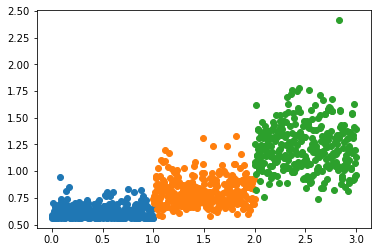

In [51]:
test = fa.Sxy_exact(sigma, a_final, theta_eta)
for i in range(3):
    plt.scatter(np.linspace(i, i+1, Nrepeat), test[i])

In [83]:
atests = np.random.randn(320)+1.36
test = fa.Iyeta_exact(sigma, atests, theta_eta)
test**2/np.var(test)/fa.Sxy_exact(sigma, atests, theta_eta)

array([3.50408255e+00, 1.81105048e+00, 3.29444794e+00, 3.13916940e+00,
       2.00874879e+00, 2.60274372e+00, 3.42709651e+00, 1.77463979e+00,
       3.01668323e+00, 2.67292478e+00, 3.42957426e+00, 3.49827341e+00,
       3.50568816e+00, 2.95515648e+00, 3.00547209e-01, 3.39314139e-02,
       3.48405403e+00, 5.12027679e-02, 2.51576238e+00, 2.42251055e+00,
       1.82364642e+00, 1.49050460e+00, 8.84113777e-01, 3.23906567e+00,
       2.87492523e+00, 3.29092496e+00, 3.33803495e+00, 3.21042730e+00,
       3.29864349e+00, 2.50840610e+00, 1.78634573e+00, 2.39152912e+00,
       3.47025267e+00, 3.05073448e+00, 2.51342092e+00, 2.09855658e+00,
       2.31568448e+00, 3.47321011e+00, 3.16977991e+00, 2.28045275e+00,
       4.28538923e-02, 1.56242040e+00, 2.19484823e+00, 3.08462045e+00,
       9.73581379e-01, 3.50501499e+00, 1.53844910e-01, 1.73697743e+00,
       3.24755713e+00, 3.37705690e+00, 1.18101359e+00, 8.46374753e-02,
       1.62353358e+00, 3.25216086e-03, 2.05400092e+00, 2.01927016e+00,
      

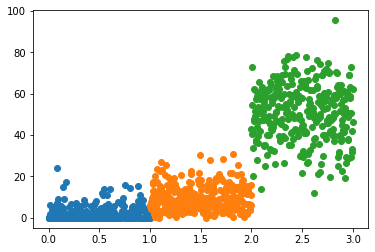

In [62]:
test = fa.Iyeta_exact(sigma, a_final, theta_eta)
test = test**2/np.var(test, axis = 1)[..., None]
for i in range(3):
    plt.scatter(np.linspace(i, i+1, Nrepeat), test[i])

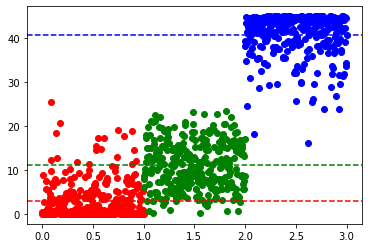

In [74]:
Nstepstests = np.array([1000,10000,100000])
test = fa.Iyeta_exact(sigma, a_final, theta_eta)
test = test**2/np.var(test, axis = 1)[..., None]/fa.Sxy_exact(sigma, a_final, theta_eta)
colors = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(np.linspace(i, i+1, Nrepeat), test[i], c = colors[i])
    plt.axhline(np.mean(test[i]), linestyle = '--', c = colors[i])

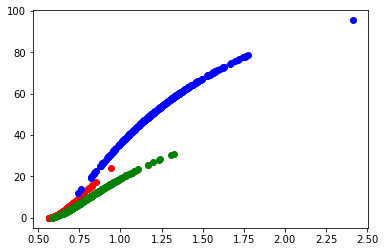

In [90]:
Nstepstests = np.array([1000,10000,100000])
test = fa.Iyeta_exact(sigma, a_final, theta_eta)
test = test**2/np.var(test, axis = 1)[..., None]
colors = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(fa.Sxy_exact(sigma, a_final[i], theta_eta), test[i], c = colors[i])

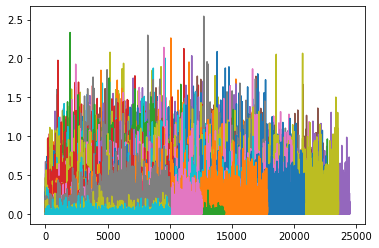

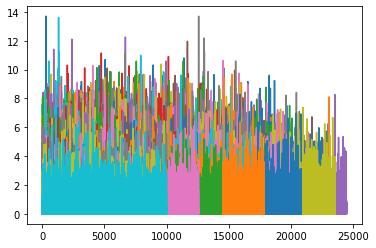

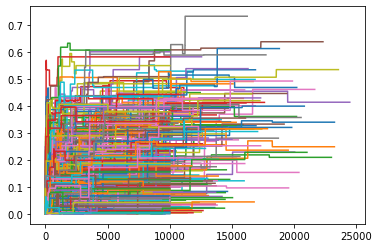

12356.796875 3185.2679438887453
0.23305895093862866 0.1507272958478341


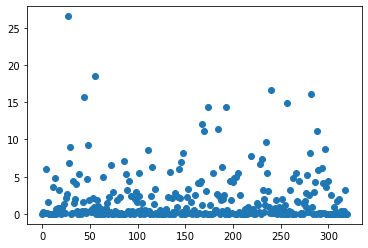

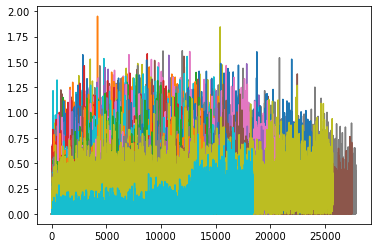

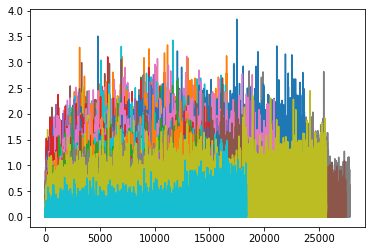

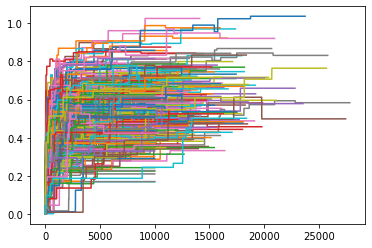

12738.165625 3415.8001214127503
0.5637532259132934 0.15205866165775367


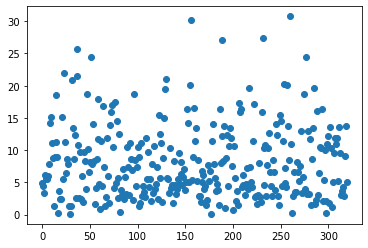

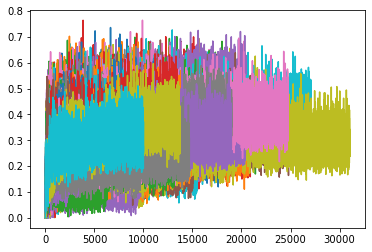

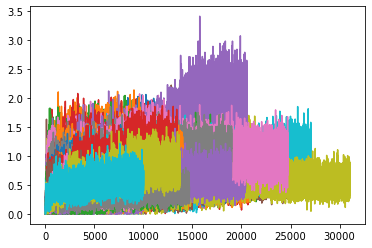

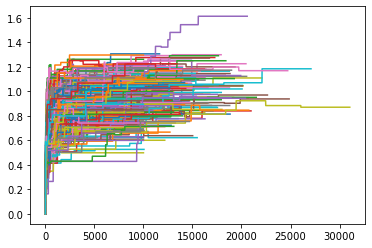

12785.24375 3556.9728144991404
0.9552042285133184 0.15957323074229568


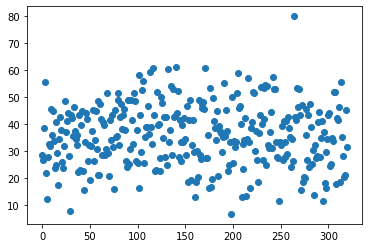

In [42]:
for i in range(3):
    Ixy_adapt = np.load(f'../data/adapt_Ixy_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    Sxy_adapt = np.load(f'../data/adapt_Sxy_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    a_adapt = np.load(f'../data/adapt_a_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    stop_time_adapt = np.load(f'../data/adapt_stopTime_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')

    Ixy_adapt[Ixy_adapt < 0] = 0
    Sxy_adapt[Sxy_adapt < 0] = 0

    for j in range(Nrepeat):
        Ixy_curr = Ixy_adapt[j, :stop_time_adapt[j]]
        plt.plot(Ixy_curr/(Nsteps_array[i]))
    plt.show()
    
    for j in range(Nrepeat):
        Sxy_curr = Sxy_adapt[j, :stop_time_adapt[j]]
        plt.plot(Sxy_curr/(Nsteps_array[i]))
    plt.show()
    a_final = np.zeros(Nrepeat)
    for j in range(Nrepeat):
        a_curr = a_adapt[j, :stop_time_adapt[j]]
        plt.plot(abs(a_curr))
        a_final[j] = abs(a_curr[-1])
    plt.show()

    print(np.mean(stop_time_adapt), np.std(stop_time_adapt))
    print(np.mean(a_final), np.std(a_final))

    Stot = np.zeros(Nrepeat)
    Iyeta = np.zeros(Nrepeat)
    timetot = np.zeros(Nrepeat)

    for j in range(Nrepeat):
        timetot[j] = Nsteps_array[i]*stop_time_adapt[j]*dt
        Stot[j] = fa.Sxy_exact(sigma, a_final[j], theta_eta)*timetot[j]
        Iyeta[j] = fa.Ixy_exact(sigma, a_final[j], theta_eta)

    plt.scatter(range(Nrepeat),Iyeta**2/np.var(Iyeta))
    plt.show()
    print()

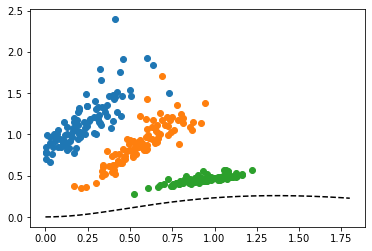

In [14]:
for i in range(3):
    a_adapt = np.load(f'../data/adapt_a_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    L_adapt = np.load(f'../data/adapt_L_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    stop_time_adapt = np.load(f'../data/adapt_stopTime_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    a_final = np.zeros(Nrepeat)
    L_final = np.zeros(Nrepeat)

    for j in range(Nrepeat):
        a_final[j] = abs(a_adapt[j, stop_time_adapt[j]])
        L_final[j] = L_adapt[j, stop_time_adapt[j]]

    plt.scatter(abs(a_final), L_final)

plt.plot(a_array, fa.functional_exact(sigma, a_array, theta_eta, Lambda), 'k--')
plt.show()

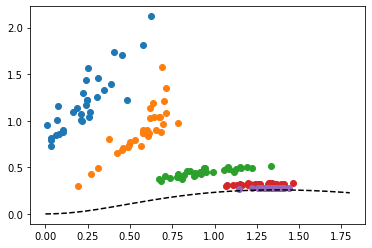

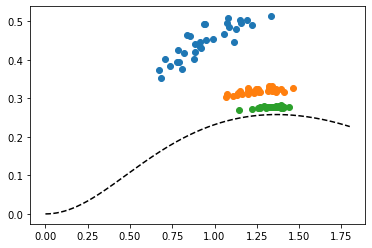

In [27]:
for i in range(5):
    a_adapt = np.load(f'../data/adapt_a_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_Nadapt{Nadapt}.npy')
    L_adapt = np.load(f'../data/adapt_L_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_Nadapt{Nadapt}.npy')

    plt.scatter(abs(a_adapt[:,-1]), L_adapt[:,-1])

plt.plot(a_array, fa.functional_exact(sigma, a_array, theta_eta, Lambda), 'k--')
plt.show()

for i in range(2, 5):
    a_adapt = np.load(f'../data/adapt_a_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_Nadapt{Nadapt}.npy')
    L_adapt = np.load(f'../data/adapt_L_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_Nadapt{Nadapt}.npy')

    plt.scatter(abs(a_adapt[:,-1]), L_adapt[:,-1])

plt.plot(a_array, fa.functional_exact(sigma, a_array, theta_eta, Lambda), 'k--')
plt.show()

0.18544768550532467
0.5175469462023764
0.945869465546001
1.262446686488209
1.3473934513609471


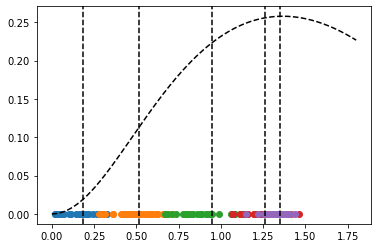

In [18]:
for i in range(5):
    a_adapt = np.load(f'../data/adapt_a_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_Nadapt{Nadapt}.npy')

    plt.scatter(abs(a_adapt[:,-1]), np.zeros(a_adapt.shape[0]))

    plt.axvline(np.mean(abs(a_adapt[:,-1])), color='k', linestyle='--')
    print(np.mean(abs(a_adapt[:,-1])))
plt.plot(a_array, fa.functional_exact(sigma, a_array, theta_eta, Lambda), 'k--')
plt.show()

0.18544768550532467
0.5175469462023764
0.945869465546001
1.262446686488209
1.3473934513609471


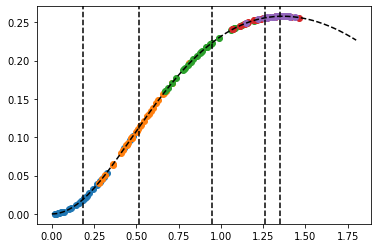

In [19]:
for i in range(5):
    a_adapt = np.load(f'../data/adapt_a_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_Nadapt{Nadapt}.npy')

    plt.scatter(abs(a_adapt[:,-1]), fa.functional_exact(sigma, a_adapt[:,-1], theta_eta, Lambda))

    plt.axvline(np.mean(abs(a_adapt[:,-1])), color='k', linestyle='--')
    print(np.mean(abs(a_adapt[:,-1])))
plt.plot(a_array, fa.functional_exact(sigma, a_array, theta_eta, Lambda), 'k--')
plt.show()

# Tests

In [8]:
@njit
def simulate_xyeta(Nsteps, dt, sigma, a, theta_eta, tau_x = 1, theta_y = 1, x0 = 0, y0 = 0, eta0 = 0):
    x = np.zeros(Nsteps, dtype=np.float64)
    y = np.zeros(Nsteps, dtype=np.float64)
    eta = np.zeros(Nsteps, dtype=np.float64)

    tau_y = theta_y * tau_x
    tau_eta = theta_eta * tau_x
    sqtau_x = np.sqrt(dt/tau_x)
    sqtau_y = np.sqrt(dt/tau_y)
    sqtau_eta = np.sqrt(dt/tau_eta)

    x[0] = x0
    y[0] = y0
    eta[0] = eta0


    for t in range(Nsteps-1):
        y[t + 1] = y[t] + dt * (-y[t] + a * x[t])/tau_y + np.random.randn() * sqtau_y
        x[t + 1] = x[t] + dt * (-x[t] + sigma * eta[t])/tau_x + np.random.randn() * sqtau_x
        eta[t + 1] = eta[t] + dt * (-eta[t])/tau_eta + np.random.randn() * sqtau_eta
        
        
    return x, y, eta

In [120]:
@njit
def cov_matrix(sigma, theta_eta, a):
    theta = 1 + theta_eta
    offdiag = 1/2*a*(1 + theta_eta*sigma**2*(1+2*theta_eta)/theta**2)
    return np.array([[1 + theta_eta*sigma**2/theta,
                      offdiag],
                     [offdiag,
                      1 + a*offdiag]])

@njit
def probability_xy(x, y, det, cov_inv):
    return np.exp(-0.5 * (x**2 * cov_inv[0,0] + y**2 * cov_inv[1,1] + 2*x*y*cov_inv[0,1])) / (2*np.pi*np.sqrt(det))

@njit
def probability_x(x, cov):
    return np.exp(-0.5 * (x**2 / cov[0,0])) / (np.sqrt(2*np.pi*cov[0,0]))

@njit
def probability_y(y, cov):
    return np.exp(-0.5 * (y**2 / cov[1,1])) / (np.sqrt(2*np.pi*cov[1,1]))

@njit
def find_mutual_traj(Nsteps, dt, sigma, a, theta_eta, tau_x = 1, theta_y = 1, Nburn = 1000000):
    x0, y0, eta0 = simulate_xyeta(Nburn, dt, sigma, a, theta_eta, tau_x, theta_y)
    x, y, _ = simulate_xyeta(Nsteps, dt, sigma, a, theta_eta, tau_x, theta_y, x0[-1], y0[-1], eta0[-1])
    x0 = None
    y0 = None

    cov = cov_matrix(sigma, theta_eta, a)
    det = np.linalg.det(cov)
    cov_inv = np.linalg.inv(cov)


    mutual_trajectory = np.zeros(Nsteps, dtype=np.float64)

    for t in range(Nsteps):
        pjoint_curr = probability_xy(x[t], y[t], det, cov_inv)
        px_curr = probability_x(x[t], cov)
        py_curr = probability_y(y[t], cov)
        mutual_trajectory[t] = np.log(pjoint_curr / (px_curr * py_curr))

    return mutual_trajectory, x, y

@njit
def find_Axy(sigma, theta_eta, a):
    theta = 1 + theta_eta

    den = (4 + a**2)*theta**4 + 2*(2+a**2)*theta_eta*theta**3*sigma**2
    den += a**2*theta_eta**2*(theta + theta_eta)*sigma**4

    num1 = 4*theta**4 + a**2*(theta**4 + 2*(theta_eta + theta_eta**2)**2*sigma**2 - theta_eta**2*(theta + theta_eta)*sigma**4)
    num2 = 2*a*theta_eta*theta*sigma**2*(-1+theta_eta**2-theta_eta*sigma**2)

    return np.array([[num1/den, - num2/den],
                     [- a, 1]])

@njit
def find_Sxy_traj(Nsteps, dt, sigma, a, theta_eta, tau_x = 1, theta_y = 1, Nburn = 1000000):
    x0, y0, eta0 = simulate_xyeta(Nburn, dt, sigma, a, theta_eta, tau_x, theta_y)
    x, y, _ = simulate_xyeta(Nsteps, dt, sigma, a, theta_eta, tau_x, theta_y, x0[-1], y0[-1], eta0[-1])
    x0 = None
    y0 = None

    Amat = find_Axy(sigma, theta_eta, a)

    Sx_traj = np.zeros(Nsteps - 1, dtype = np.float64)
    Sy_traj = np.zeros(Nsteps - 1, dtype = np.float64)

    for t in range(Nsteps-1):
        Deltax = x[t+1] - x[t]
        Deltay = y[t+1] - y[t]
        Stratx = 1/2*(x[t+1] + x[t])
        Straty = 1/2*(y[t+1] + y[t])
        Sx_traj[t] = (-Amat[0,0]*Stratx - Amat[0,1]*Straty)*Deltax/dt
        Sy_traj[t] = (-Amat[1,0]*Stratx - Amat[1,1]*Straty)*Deltay/dt

        # Sx_traj[t], Sy_traj[t] = -np.dot(Amat, 1/2*np.array([x[t] + x[t+1] , y[t] + y[t+1]]))*np.array([x[t+1] - x[t] , y[t+1] - y[t]])

    return Sx_traj, Sy_traj

@njit
def find_functional(Nsteps, dt, sigma, a, theta_eta, Lambda, x0, y0, eta0, tau_x = 1, theta_y = 1):
    x, y, eta = simulate_xyeta(Nsteps, dt, sigma, a, theta_eta, tau_x, theta_y, x0, y0, eta0)

    Amat = find_Axy(sigma, theta_eta, a)
    cov = cov_matrix(sigma, theta_eta, a)
    det = np.linalg.det(cov)
    cov_inv = np.linalg.inv(cov)

    Sxy = 0.
    Ixy = 0.

    for t in range(Nsteps-1):
        Delta_x = x[t+1] - x[t]
        Delta_y = y[t+1] - y[t]
        Strat_x = 1/2*(x[t+1] + x[t])
        Strat_y = 1/2*(y[t+1] + y[t])

        Sxy += -2*(Amat[0,0]*Strat_x + Amat[0,1]*Strat_y)*Delta_x/dt
        Sxy += -2*(Amat[1,0]*Strat_x + Amat[1,1]*Strat_y)*Delta_y/dt

        pjoint_curr = probability_xy(x[t], y[t], det, cov_inv)
        px_curr = probability_x(x[t], cov)
        py_curr = probability_y(y[t], cov)
        Ixy += np.log(pjoint_curr / (px_curr * py_curr))

    return -(1 - Lambda)*Sxy/(Nsteps - 1) + Lambda*Ixy/(Nsteps - 1), x[-1], y[-1], eta[-1]

In [148]:
@njit
def adaptive_dynamics(Nadapt, Nsteps, dt, sigma, theta_eta, Lambda, delta_a, p_acc = 0.01,
                      a_init = 0., tau_x = 1, theta_y = 1, Nburn = 100000):
    
    x0_burn, y0_burn, eta0_burn = simulate_xyeta(Nburn, dt, sigma, a_init, theta_eta, tau_x, theta_y)
    x0 = x0_burn[-1]
    y0 = y0_burn[-1]
    eta0 = eta0_burn[-1]

    x0_burn = None
    y0_burn = None
    eta0_burn = None

    L_adapt = np.zeros(Nadapt, dtype = np.float64)
    a_adapt = np.zeros(Nadapt, dtype = np.float64)
    L_adapt[0] = 0.
    a_adapt[0] = a_init

    for idx_adapt in range(1, Nadapt):
        a_bar = a_adapt[idx_adapt - 1] + delta_a * np.random.randn()
        L_bar, x0, y0, eta0 = find_functional(Nsteps, dt, sigma, a_bar, theta_eta, Lambda, x0, y0, eta0, tau_x, theta_y)

        if L_bar > L_adapt[idx_adapt - 1]:
            a_adapt[idx_adapt] = a_bar
            L_adapt[idx_adapt] = L_bar
        elif np.random.rand() < p_acc:
            a_adapt[idx_adapt] = a_bar
            L_adapt[idx_adapt] = L_bar
        else:
            a_adapt[idx_adapt] = a_adapt[idx_adapt - 1]
            L_adapt[idx_adapt] = L_adapt[idx_adapt - 1]

    return a_adapt, L_adapt

In [182]:
%%time

Nsteps = int(1e5)
Nadapt = 5000
sigma = 1.7
theta_eta = 1.2
delta_a = 0.05

Lambda = 0.9

dt = 1e-3

a_adapt, L_adapt = adaptive_dynamics(Nadapt, Nsteps, dt, sigma, theta_eta, Lambda, delta_a, p_acc = 0.00)
a_adapt = abs(a_adapt)

CPU times: user 29.3 s, sys: 396 ms, total: 29.7 s
Wall time: 30.2 s


0.8729501753128484


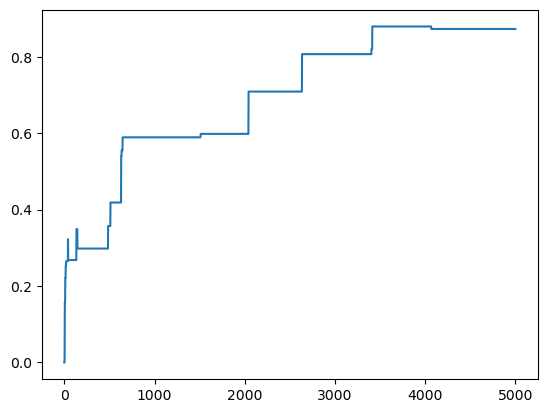

In [183]:
plt.plot(a_adapt)
print(a_adapt[-1])

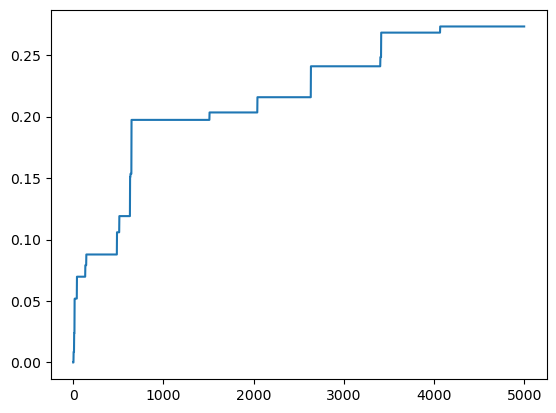

In [184]:
plt.plot(L_adapt)

In [110]:
Nsteps = int(5e5)
sigma = 0.63
theta_eta = 3.2
a = 9.6

Lambda = 0.9

dt = 1e-3

find_functional(Nsteps, dt, sigma, a, theta_eta, Lambda, x0 = 0., y0 = 0., eta0 = 0., tau_x = 1, theta_y = 1)

-4.466689688205942

In [111]:
Nsteps = int(5e7)
sigma = 0.63
theta_eta = 3.2
a = 9.6
dt = 1e-3
Sx_traj, Sy_traj = find_Sxy_traj(Nsteps, dt, sigma, a, theta_eta, Nburn = 100000)

In [100]:
Sx_traj.mean(), Sy_traj.mean()

(-0.043062922122522655, 24.687403456573062)

In [84]:
Nsteps = int(5e7)
sigma = 0.63
theta_eta = 1.2
a = 13.1
dt = 1e-4

MI_traj, xMI, yMI = find_mutual_traj(Nsteps, dt, sigma, a, theta_eta, Nburn = 100000)

In [85]:
MI_traj.mean()

0.39543734152677096

In [74]:
find_Axy(sigma, theta_eta, a)

array([[ 8.20845124e-01,  1.65803590e-04],
       [-1.31000000e+01,  1.00000000e+00]])